# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('../dataset/LinearRegressionData.csv')

In [6]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [10]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지 데이 (독립 변수 - 원인)
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 (종속 변수 - 결과)

In [12]:
X, Y


(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)


LinearRegression()

In [16]:
y_pred = reg.predict(X) # X 에 대한 예측 값
y_pred


array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

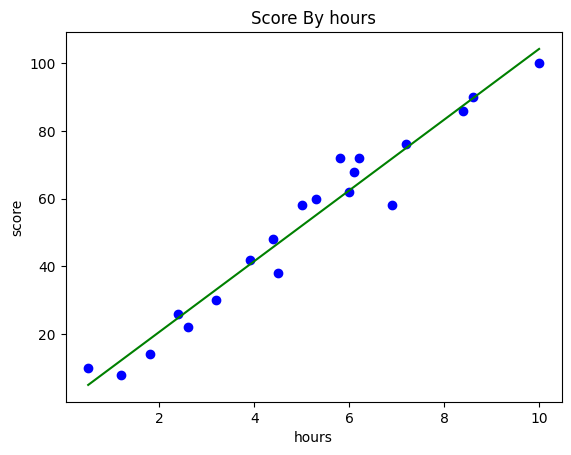

In [26]:
plt.scatter(X, y, color='blue') # 선정도
plt.plot(X, y_pred, color='green') # 선 그래프
plt.title('Score By hours') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


In [31]:
print('9시간 공부 했을 때 예상 점수 : ', reg.predict([ [9] ]))


9시간 공부 했을 때 예상 점수 :  [93.77478776]


In [33]:
reg.coef_ # 기울기 (m)


array([10.44369694])

In [34]:
reg.intercept_ # y 절편 (b)


-0.218484702867201

### dataset 분리


In [35]:
import matplotlib.pyplot as plt
import pandas as pd


In [36]:
dataset = pd.read_csv('../dataset/LinearRegressionData.csv')


In [37]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 테스트 세트를 20% / 랜덤은 실무에선 사용 X


### 분리된 데이터를 통한 모델링

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [51]:
reg.fit(X_train, y_train) # 훈련 세트로 학습


LinearRegression()

### 데이터 시각화 (훈련 세트)


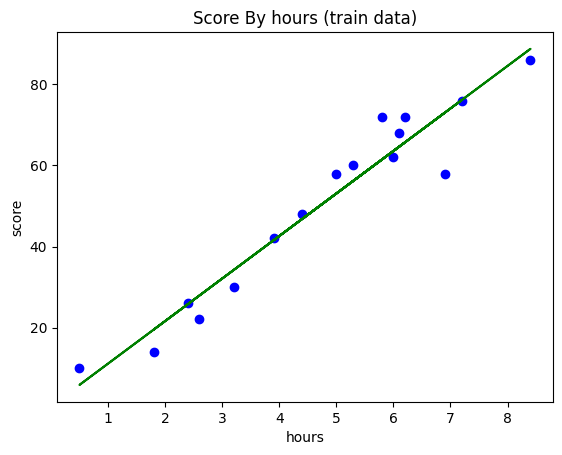

In [54]:
plt.scatter(X_train, y_train, color='blue') # 선정도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score By hours (train data)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


### 데이터 시각화 (테스트 세트)


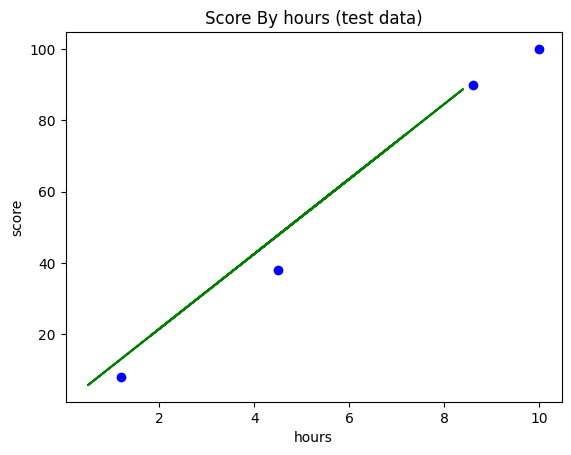

(4, 4)

In [102]:
plt.scatter(X_test, y_test, color='blue') # 선정도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score By hours (test data)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


In [59]:
reg.coef_


array([10.49161294])

In [60]:
reg.intercept_


0.6115562905169796

### 모델 평가


In [62]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가


0.9727616474310156

In [64]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가


0.9356663661221668

## 경사 하강법 (Gradient Descent)


max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)
eta0 : 학습률 (learning rate)

In [100]:
from sklearn.linear_model import SGDRegressor # SGD: Stochastic Gradient Descent 확률적 경사 하강법

# 지수표기법
# 1е-3 : 0.001 (10^-3)
# 1e-4 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)
# 1e+4: 10000 (10^4)

# sr = SGDRegressor(max_iter=1000, eta0=1e-3, random_state=0, verbose=1)
sr = SGDRegressor() # Default : max_iter=1000, eta0=1e-2
sr.fit(X_train, y_train)

SGDRegressor()

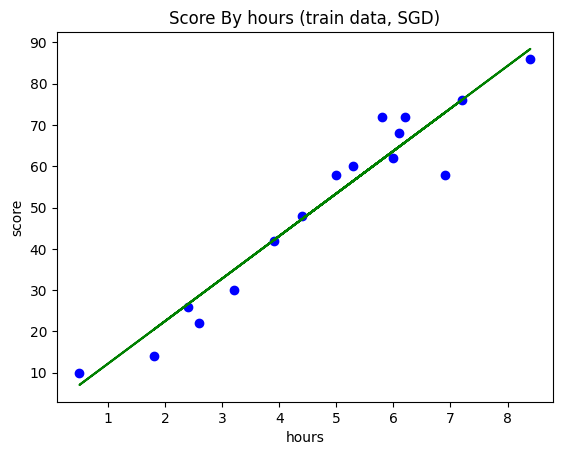

In [101]:
plt.scatter(X_train, y_train, color='blue') # 선정도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score By hours (train data, SGD)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


In [72]:
sr.coef_, sr.intercept_


(array([10.32682174]), array([1.56144757]))

In [76]:
# 데이터셋이 단순하여 테스트가 높은값이 나옴
sr.score(X_train, y_train), sr.score(X_test, y_test)


(0.9353800668051009, 0.9719293054963855)